In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [13]:
X,_ =make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

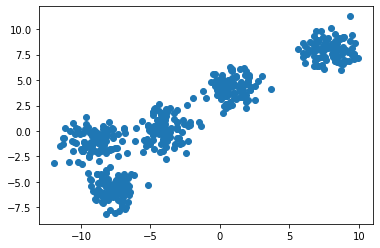

In [14]:
plt.scatter(X[:,0],X[:,1])
#five Cluster 
#we have to find labels for them for eg colour mapping 

In [15]:
k=5

In [16]:
color=["red","green","blue","yellow","orange"]

In [19]:
np.random.randint(-8,10,size=(2,))

array([6, 8])

In [21]:
for i in range(k):
    center=np.random.randint(-8,10,size=(2,))
    points =[]
    
    cluster={
        "center":center,
        "points":points,
        "color":color[i]
    }
    cluster[i]=cluster

In [23]:
print(cluster)


{'center': array([-2,  7]), 'points': [], 'color': 'orange', 4: {...}}
